# Mapping Point and Polygon Data

## Introduction

In this notebook, we’ll explore the basics of mapping point and polygon data using R. We’ll demonstrate how to access open-source spatial datasets from [*rnaturalearth*](https://cran.r-project.org/web/packages/rnaturalearth/index.html), an excellent source freely available of global administrative boundaries, cities, rivers, and other geographic features.

We’ll use sf for spatial data handling and ggplot2 for visualization, covering basic mapping techniques and styling options. This notebook provides a foundation for working with spatial data, allowing users to create informative maps with both point and polygon layers.

### ★ Prerequisites ★
* Complete Chapter 1.2: Introduciton to Natural Earth

### Open-Source Geographic Data from Natural Earth

Natural Earth provides an array of data types that can be customized by scale and region, making it a valuable resource for global and thematic mapping. Here, we used ne_countries() for national boundaries and ne_download(type = "populated_places") for city points, both at medium scale. Experimenting with different scales (e.g., large, small) allows users to balance detail and performance in different mapping contexts.

## 1. Setup
This section will guide you through the process of installing essential packages.

##### Required Packages

[**ggplot2**](https://cran.r-project.org/web/packages/ggplot2/index.html) · Create Elegant Data Visualisations Using the Grammar of Graphics.  A system for 'declaratively' creating graphics, based on "The Grammar of Graphics". You provide the data, tell 'ggplot2' how to map variables to aesthetics, what graphical primitives to use, and it takes care of the details.  This notebook uses the following functions from *ggplot2*.

* *CoordSf* · Visualize sf objects
  * *geom_sf* · geometric objects (points, lines, or polygons)
* [*ggplot*](https://rdrr.io/cran/ggplot2/man/ggplot.html) · Create a new ggplot
* [*ggtheme*](https://rdrr.io/cran/ggplot2/man/ggtheme.html) · Complete themes
  * *theme_minimal* · Minimal theme
* [*labs*](https://rdrr.io/cran/ggplot2/man/labs.html) · Modify axis, legend, and plot labels
* [*theme*](https://rdrr.io/cran/ggplot2/man/theme.html) · Modify components of a theme

[**rnaturalearth**](https://cran.r-project.org/web/packages/rnaturalearth/index.html) · World Map Data from [Natural Earth](https://www.naturalearthdata.com).  Facilitates mapping by making natural earth map data from more easily available to R users.  This notebook uses the folloing functions from *rnationalearth*.

* [*ne_countries*](https://rdrr.io/cran/rnaturalearth/man/ne_countries.html) · Get natural earth world country polygons
* [*ne_download*](https://rdrr.io/cran/rnaturalearth/man/ne_download.html) · Download data from Natural Earth and (optionally) read into R

[**rnaturalearthdata**](https://cran.r-project.org/web/packages/rnaturalearthdata/index.html) · World Vector Map Data from [Natural Earth](https://www.naturalearthdata.com) Used in [rnaturalearth](https://cran.r-project.org/web/packages/rnaturalearth/index.html). Access functions are provided in the accompanying package '[rnaturalearth](https://cran.r-project.org/web/packages/rnaturalearth/index.html).

[**sf**](https://cran.r-project.org/web/packages/sf/index.html) · Support for simple features, a standardized way to encode spatial vector data. Binds to 'GDAL' for reading and writing data, to 'GEOS' for geometrical operations, and to 'PROJ' for projection conversions and datum transformations. Uses by default the 's2' package for spherical geometry operations on ellipsoidal (long/lat) coordinates.  This notebook uses the following functions from *sf*.

* [*st_crs*](https://rdrr.io/cran/sf/man/st_crs.html) · Retrieve coordinate reference system from object
* [*st_transform*](https://rdrr.io/cran/sf/man/st_transform.html) · Transform or convert coordinates of simple feature

### 1a. Install and Load Required Packages
If you have not already installed the required packages, uncomment and run the code below:

In [16]:
# install.packages(c("ggplot2", "rnaturalearth", "rnaturalearthdata", "sf"))

Load the packages into your workspace.

In [17]:
library(ggplot2)
library(rnaturalearth)
library(rnaturalearthdata)
library(sf)

## 2. Data Acquisition with rnaturalearth

For this notebook, we’ll use the [*rnaturalearth*](https://cran.r-project.org/web/packages/rnaturalearth/index.html) and [*rnaturalearthdata*](https://cran.r-project.org/web/packages/rnaturalearthdata/index.html) packages to access and load datasets from [*Natural Earth*](https://www.naturalearthdata.com). These packages provide direct access to Natural Earth’s geographic data without requiring an API key, making it simple to bring boundaries and point data directly into R.

We’ll import the following data files:

* Countries (polygons): national boundaries of countries worldwide
* Populated Places (points): locations of major cities and towns

Each dataset will be returned as an sf object, allowing us to work easily with the files in R using the [*sf*](https://cran.r-project.org/web/packages/sf/index.html) package.

In [18]:
# country boundary polygons
countries <- ne_countries(scale = "medium", returnclass = "sf")

# populated places point locations
cities <- ne_download(scale = "medium", type = "populated_places", category = "cultural", returnclass = "sf")

Reading layer `ne_50m_populated_places' from data source 
  `C:\Users\vavra\AppData\Local\Temp\RtmpI7lpdB\ne_50m_populated_places.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1251 features and 137 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -175.2206 ymin: -90 xmax: 179.2166 ymax: 78.22097
Geodetic CRS:  WGS 84


## 3. Data Preparation

Before mapping, it’s essential to inspect the data structure and ensure that all spatial layers are in the same Coordinate Reference System (CRS). This step is crucial because different layers need to be aligned spatially to appear correctly on the map.

The *st_crs()* function allows us to check and set the CRS of spatial data in sf. If any layers use different CRSs, we can transform them using the *st_transform()* function, ensuring compatibility and accurate mapping.

In [19]:
countries <- st_transform(countries, crs = st_crs(cities))

## 4. Basic Mapping of Points and Polygons with ggplot2

Now we’re ready to map our data using the *geom_sf()* function from *ggplot2*, which handles spatial objects like sf polygons and points. Here, we’ll:

* Plot the country boundaries as filled polygons in a light gray color.
* Overlay the city points on top, using a distinct color to differentiate them from the polygon layer.

This map gives a straightforward view of the spatial distribution of countries and cities globally, and serves as a base for further styling.

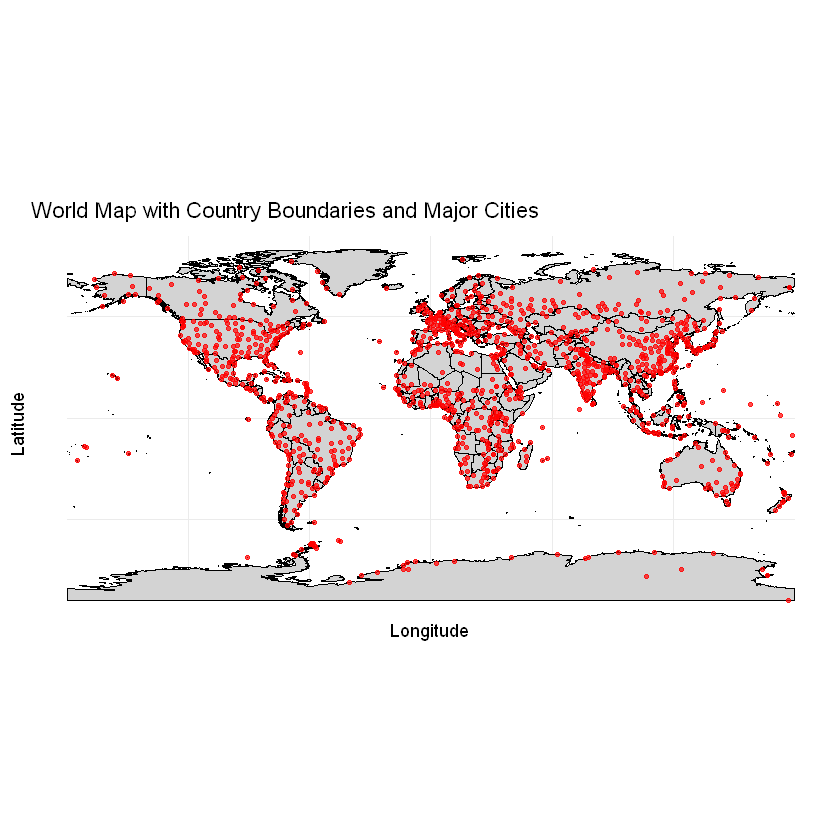

In [20]:
ggplot() +
  geom_sf(data = countries, fill = "lightgray", color = "black") +  # Country polygons
  geom_sf(data = cities, color = "red", size = 1, alpha = 0.7) +    # City points
  labs(title = "World Map with Country Boundaries and Major Cities",
       x = "Longitude", y = "Latitude") +
  theme_minimal()

## 5. Styling and Customization

To enhance our map’s readability and aesthetic, we’ll add some additional styling elements:

* Fill colors: Set the polygon fill color to lightblue and outline color to gray40.
Legend: Use scale_color_manual() to specify a color for the cities and adjust the legend to reflect the "City" label.
* Labels: Customize the map title, axis labels, and legend position.

This customization allows us to create a more visually appealing and informative map, making it easy to distinguish between the countries and cities while providing helpful labels.

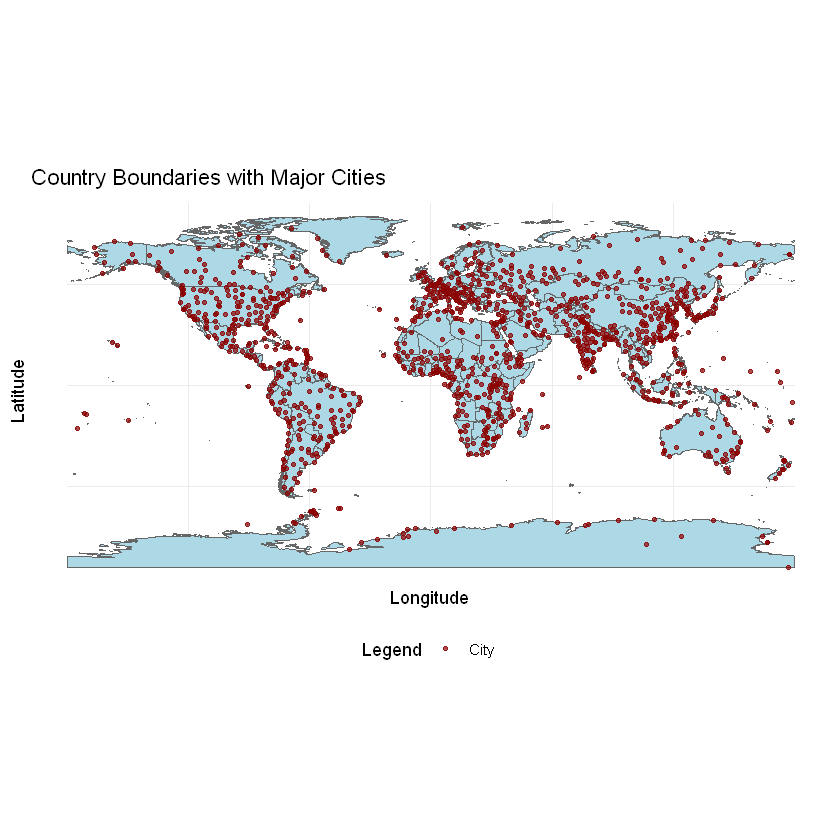

In [21]:
ggplot() +
  geom_sf(data = countries, fill = "lightblue", color = "gray40") +
  geom_sf(data = cities, aes(color = "City"), size = 1.2, alpha = 0.7) +
  scale_color_manual(values = c("City" = "darkred")) +
  labs(title = "Country Boundaries with Major Cities",
       color = "Legend",
       x = "Longitude", y = "Latitude") +
  theme_minimal() +
  theme(legend.position = "bottom")